---
title: "Linear Regression using DNN"

description: " Linear regression of California housing dataset using deep neural networks"
author: "Aakash Basnet"
date: "2024/03/04"
page-layout: full
categories:
  - keras
  - teserflow
  - AI
  - python
format:
  html:
    code-fold: false
jupyter: python3
---

## Linear regression of California housing dataset using deep neural networks

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
housing



{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [2]:
x_train_data, x_test, y_train_data, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_data, y_train_data)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

## Training the model using Sequencital API

In [3]:
import keras


input_layer = keras.layers.Dense(30, activation='relu', input_shape = x_train.shape[1:])
output_layer = keras.layers.Dense(1)

model = keras.models.Sequential([input_layer, output_layer])
model.compile(loss='mean_squared_error', optimizer='sgd')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


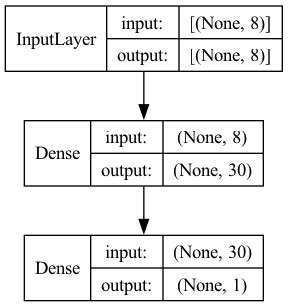

In [6]:

from keras.utils import plot_model
plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)



In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_data = (x_valid, y_valid)) 


Epoch 1/10
363/363 [==============================] - 0s 480us/step - loss: 0.8171 - val_loss: 0.5150
Epoch 2/10
363/363 [==============================] - 0s 338us/step - loss: 0.4973 - val_loss: 0.6575
Epoch 3/10
363/363 [==============================] - 0s 331us/step - loss: 0.7744 - val_loss: 0.8212
Epoch 4/10
363/363 [==============================] - 0s 330us/step - loss: 0.9866 - val_loss: 0.7670
Epoch 5/10
363/363 [==============================] - 0s 339us/step - loss: 0.4454 - val_loss: 0.6957
Epoch 6/10
363/363 [==============================] - 0s 351us/step - loss: 0.4060 - val_loss: 0.7302
Epoch 7/10
363/363 [==============================] - 0s 371us/step - loss: 0.3975 - val_loss: 0.7245
Epoch 8/10
363/363 [==============================] - 0s 371us/step - loss: 0.3849 - val_loss: 0.6687
Epoch 9/10
363/363 [==============================] - 0s 368us/step - loss: 0.3924 - val_loss: 0.7610
Epoch 10/10
363/363 [==============================] - 0s 340us/step - loss: 0.378

In [9]:
model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 280us/step - loss: 0.4701


0.4701215326786041

In [10]:
x_1 = x_test[:3]
y_pred = model.predict(x_1)
print(y_pred)

1/1 [==============================] - 0s 44ms/step
[[2.2228634 ]
 [0.82357913]
 [2.5795836 ]]


## Building complex models ushing Functional API (non sequential)

In [11]:
input_ = keras.layers.Input(shape = x_train.shape[1:])
hidden_layer_1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden_layer_2 = keras.layers.Dense(30, activation='relu') (hidden_layer_1)
concat_layer = keras.layers.Concatenate()([input_, hidden_layer_2])
output_layer = keras.layers.Dense(1)(concat_layer)

model2 = keras.Model(inputs = [input_], outputs = [output_layer])
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_2 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_3 (Dense)             (None, 30)                   930       ['dense_2[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_3[0][0]']         

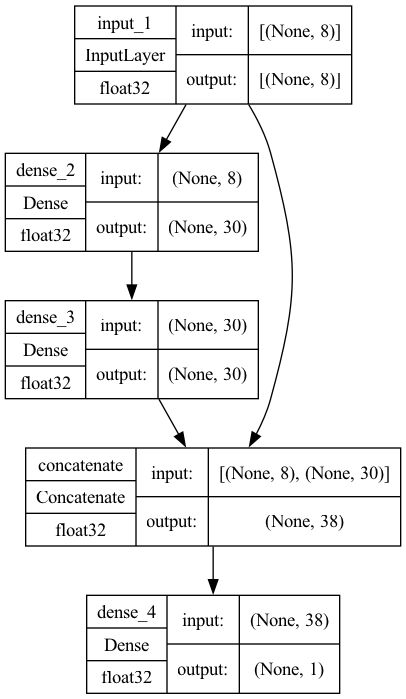

In [16]:
plot_model(
    model2,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)